<a href="https://colab.research.google.com/github/Eliud-17/spice.com/blob/main/ENC221_0414_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Imports Necessary Libraries: It imports essential libraries such as pandas, geopandas, matplotlib, seaborn, scipy, and numpy for data manipulation, geospatial data handling, visualization, statistical visualization, spatial indexing, and numerical operations.

Loads the Data: The code loads diabetes data from an Excel file located in Google Drive using the pd.read_excel() function from pandas.

Loads Zimbabwe Shapefile: It loads the shapefile for Zimbabwe using the gpd.read_file() function from geopandas, containing geographical boundaries of Zimbabwe.

Plots the Shapefile: The code plots the geographical boundaries of Zimbabwe using the plot() function from geopandas, setting the color of the shapefile to light grey and the color of its edges to black.

Plots Diabetes Data Points: It extracts latitude and longitude coordinates of diabetes incidence locations from the loaded data and plots these points on the map using the plt.scatter() function from matplotlib. The points are colored blue, sized 10, and have a transparency of 0.6.

Displays the Plot: Finally, the code displays the plot with the shapefile and diabetes data points overlaid using the plt.show() function.

In [18]:
# Importing necessary libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
from scipy.spatial import cKDTree
import numpy as np

# Load the data
data = pd.read_excel('https://github.com/Eliud-17/spice.com/raw/main/diabetes_zimbabwe.xlsx')

# Load Zimbabwe shapefile
zimbabwe_shapefile = gpd.read_file("https://github.com/Eliud-17/spice.com/blob/main/gadm41_ZWE_0.shp")

# Plot the shapefile
zimbabwe_shapefile.plot(color='lightgrey', edgecolor='black', figsize=(10, 8))

# Plot diabetes data points on the map
x = data['Longitude']
y = data['Latitude']
plt.scatter(x, y, color='blue', s=10, alpha=0.6)
plt.title("Spatial Representation of Diabetes Incidence Locations in Zimbabwe")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


ERROR:fiona._env:`/vsicurl/https://github.com/Eliud-17/spice.com/blob/main/gadm41_ZWE_0.shp' not recognized as a supported file format.


DriverError: '/vsicurl/https://github.com/Eliud-17/spice.com/blob/main/gadm41_ZWE_0.shp' not recognized as a supported file format.

In [4]:
# Print the column names to identify the correct names for latitude and longitude
print(data.columns)



Index(['ID', 'Longitude', 'Latitude', 'Status'], dtype='object')


In [5]:
# Print unique values in the 'Longitude' column
print(data['Longitude'].unique())




[29.98760986 29.60194016 30.50114059 ... 31.10525144 31.07714417
 31.19056909]



This code block performs kernel density estimation (KDE) to visualize the spatial density of diabetes incidence in Zimbabwe using latitude and longitude coordinates extracted from the diabetes data. Here's a summary of the code:

Extract Latitude and Longitude Coordinates: It extracts latitude and longitude coordinates from the diabetes data and assigns them to variables x and y, respectively.

Kernel Density Plot: The sns.kdeplot() function from seaborn is used to create a kernel density plot. This plot estimates the probability density function of the spatial distribution of diabetes incidence in Zimbabwe. The x and y variables containing longitude and latitude coordinates are passed as arguments. The cmap="Blues" argument sets the colormap to shades of blue, shade=True fills the contours, and bw_adjust=0.5 adjusts the bandwidth of the kernel density estimation.

Customization and Display: The plot's title, xlabel, and ylabel are set using plt.title(), plt.xlabel(), and plt.ylabel() functions, respectively. Finally, the plot is displayed using plt.show().

<ipython-input-6-7067a2f84305>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=x, y=y, cmap="Blues", shade=True, bw_adjust=0.5)


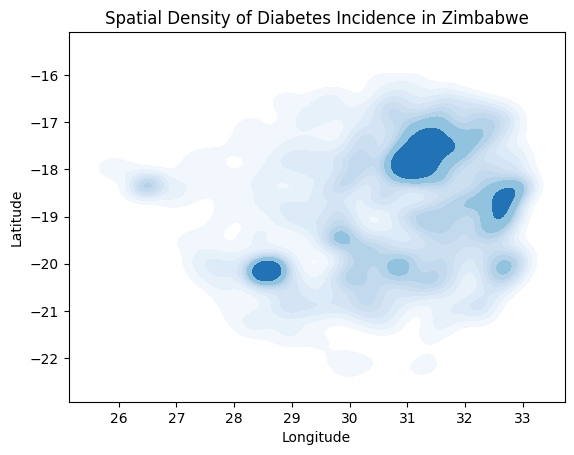

In [6]:
# Extract latitude and longitude coordinates from the diabetes data
x = data['Longitude']
y = data['Latitude']


# Kernel density plot
sns.kdeplot(x=x, y=y, cmap="Blues", shade=True, bw_adjust=0.5)
plt.title("Spatial Density of Diabetes Incidence in Zimbabwe")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



This code performs nearest neighbor analysis for the given latitude and longitude coordinates of data points representing diabetes incidence locations in Zimbabwe. Let's break down the code:

Importing Libraries: The code imports necessary libraries including numpy, pandas, geopandas, scipy, and matplotlib.

Data Preprocessing: It removes rows with NaN or infinite values in the Latitude and Longitude columns to ensure data integrity.

Extract Latitude and Longitude: Latitude and longitude values are extracted from the data and stored in arrays x and y respectively.

Computing Euclidean Distance: Using the cKDTree implementation from scipy, it computes the nearest neighbor distance for each data point. The average nearest neighbor distance is calculated as the mean of the second column of the distances array.

Plotting: It plots each data point and its nearest neighbor using plt.scatter() and plt.plot() functions. The average nearest neighbor distance is indicated by a dashed green line.

Customization and Display: Axes labels, title, and a legend are added to the plot using plt.xlabel(), plt.ylabel(), plt.title(), and plt.legend() functions. Finally, the plot is displayed using plt.show().

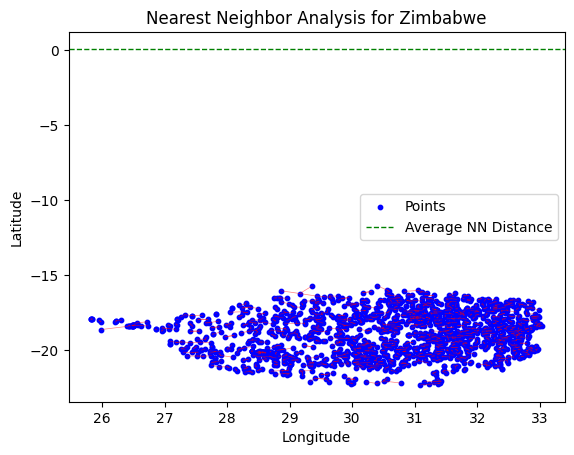

In [7]:
import numpy as np
import pandas as pd
import geopandas as gpd
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt



# Remove rows with NaN or infinite values in Latitude and Longitude columns
data.dropna(subset=['Latitude', 'Longitude'], inplace=True)
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Extract latitude and longitude from the data
x = data['Longitude'].values
y = data['Latitude'].values

# Computing euclidean distance
if len(x) > 0 and len(y) > 0:  # Check if there are valid data points
    tree = cKDTree(np.column_stack((x, y)))
    # find the nearest neighbor for each point
    distances, indices = tree.query(tree.data, k=2)

    # Calculate the average nearest neighbor distance
    average_nn_distance = np.mean(distances[:, 1])

    # Load shapefile for Zimbabwe
    #zimbabwe_shapefile = gpd.read_file('zimbabwe_shapefile.shp')

    # Plot the shapefile for Zimbabwe
    #zimbabwe_shapefile.plot(color='white', edgecolor='black')

    # Plot each point and its nearest neighbor
    plt.scatter(x, y, color='blue', label='Points', s=10)
    for i, (xi, yi) in enumerate(zip(x, y)):
        plt.plot([xi, x[indices[i][1]]], [yi, y[indices[i][1]]], color='red', alpha=0.5, linewidth=0.5)

    # Plot the average nearest neighbor distance
    plt.axhline(average_nn_distance, color='green', linestyle='dashed', linewidth=1, label='Average NN Distance')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Nearest Neighbor Analysis for Zimbabwe')
    plt.legend()
    plt.show()
else:
    print("No valid latitude or longitude values found.")


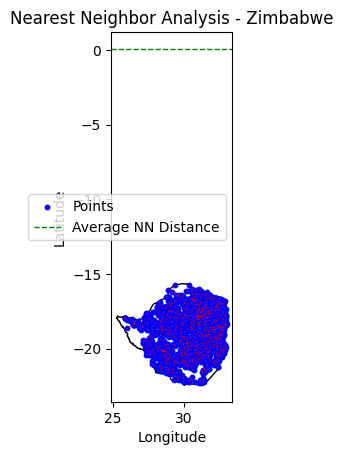

Average Nearest Neighbor Distance: 0.06591391736655035


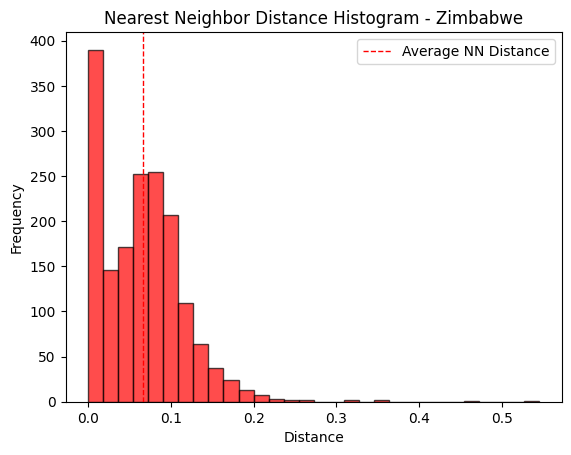

In [8]:
import numpy as np
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
import geopandas as gpd

# Load shapefile for Zimbabwe
#zimbabwe_shapefile = gpd.read_file('zimbabwe_shapefile.shp')

# Extract latitude and longitude from the data
x = data['Longitude'].values
y = data['Latitude'].values

# Computing euclidean distance
tree = cKDTree(np.column_stack((x, y)))
# find the nearest neighbor for each point
distances, indices = tree.query(tree.data, k=2)

# Calculate the average nearest neighbor distance
average_nn_distance1 = distances[:, 1]
average_nn_distance = np.mean(distances[:, 1])

# Plot the shapefile for Zimbabwe
zimbabwe_shapefile.plot(color='white', edgecolor='black')

# Plot each point and its nearest neighbor
plt.scatter(x, y, color='blue', label='Points', s=10)
for i, (xi, yi) in enumerate(zip(x, y)):
    plt.plot([xi, x[indices[i][1]]], [yi, y[indices[i][1]]], color='red', alpha=0.5, linewidth=0.5)

# Plot the average nearest neighbor distance
plt.axhline(average_nn_distance, color='green', linestyle='dashed', linewidth=1, label='Average NN Distance')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Nearest Neighbor Analysis - Zimbabwe')
plt.legend()
plt.show()

print("Average Nearest Neighbor Distance:", average_nn_distance)

# Plot a histogram of nearest neighbor distances
plt.hist(average_nn_distance1, bins=30, color='red', edgecolor='black', alpha=0.7)
plt.axvline(average_nn_distance, color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Nearest Neighbor Distance Histogram - Zimbabwe')
plt.legend(['Average NN Distance'])
plt.show()



This code calculates the mean center of the dataset points representing diabetes incidence locations in Zimbabwe and visualizes it along with the dataset points on a map. Let's go through the code:

Importing Necessary Libraries: The code imports pandas, geopandas, matplotlib.pyplot, and numpy libraries for data manipulation, geospatial data handling, and visualization.

Extract Latitude and Longitude: Latitude and longitude values are extracted from the data and stored in arrays x and y respectively.

Calculating the Mean Center: The mean latitude and longitude are calculated using numpy's np.mean() function.

Printing the Mean Center Coordinates: The mean center coordinates are printed to the console.

Creating a GeoDataFrame for Mean Center: A GeoDataFrame is created to represent the mean center as a point using the calculated latitude and longitude.

Plotting the Country Shapefile: The shapefile for Zimbabwe is plotted using zimbabwe_shapefile.plot().

Plotting Dataset Points: The dataset points representing diabetes incidence locations are plotted on the map using plt.scatter(). Points are colored yellow and labeled as "Dataset Points".

Plotting the Mean Center: The mean center is plotted on the map using plt.plot(). It is represented by a red cross marker labeled as "Mean Center".

Customization and Display: Axes labels, title, and a legend are added to the plot using plt.xlabel(), plt.ylabel(), plt.title(), and plt.legend() functions. Finally, the plot is displayed using plt.show().

Mean Center Coordinates:
Latitude: -18.871582043189193
Longitude: 30.575636440561848


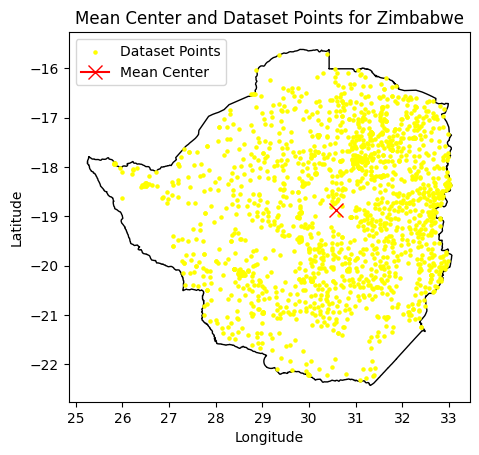

In [9]:
# Importing necessary libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Extract latitude and longitude from the data
x = data['Longitude'].values
y = data['Latitude'].values

# Calculate the mean center
mean_lat = np.mean(latitude)
mean_lon = np.mean(longitude)

print("Mean Center Coordinates:")
print("Latitude:", mean_lat)
print("Longitude:", mean_lon)

# Create a GeoDataFrame
mean_center = gpd.GeoDataFrame(geometry=gpd.points_from_xy([mean_lon], [mean_lat]), crs="EPSG:4326")

# Load the country shapefile for Zimbabwe
#zimbabwe_shapefile = gpd.read_file('zimbabwe_shapefile.shp')

# Plot the country shapefile
zimbabwe_shapefile.plot(color='white', edgecolor='black')

# Plot the dataset points with reduced size
plt.scatter(longitude, latitude, color='yellow', label='Dataset Points', s=5)

# Plot the mean center with a cross
plt.plot(mean_lon, mean_lat, marker='x', color='red', markersize=10, label='Mean Center')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean Center and Dataset Points for Zimbabwe')
plt.legend()
plt.show()



This code calculates and visualizes the standard deviation ellipse for the given latitude and longitude coordinates of data points representing diabetes incidence locations in Zimbabwe. Let's break down the code:

Imports Necessary Libraries: The code imports numpy, matplotlib.pyplot, and chi2 from scipy.stats for numerical operations, plotting, and chi-square distribution calculations respectively.

Extract Latitude and Longitude: Latitude and longitude values are extracted from the data and stored in arrays x and y respectively.

Check for Invalid Values: The code checks for NaN or infinite values in the latitude and longitude arrays using logical OR operations and stores the result in invalid_values.

Remove Invalid Values: Invalid values are removed from latitude and longitude arrays using boolean indexing.

Calculate Mean, Covariance Matrix, and Eigenvalues/Eigenvectors: The mean latitude and longitude are calculated using np.mean(), and the covariance matrix of latitude and longitude is calculated using np.cov(). Eigenvalues and eigenvectors of the covariance matrix are then computed using np.linalg.eig().

Calculate Rotation Angle and Standard Deviations: The angle of rotation for the ellipse is determined using np.arctan2(). Standard deviations along the major and minor axes are calculated using the chi-square distribution.

Generate Points on the Ellipse: Points on the ellipse are generated using parametric equations for an ellipse.

Plotting: The dataset points are plotted using plt.scatter(), and the standard deviation ellipse is plotted using plt.plot() with a dashed linestyle.

Customization and Display: Axes labels, title, and a legend are added to the plot using plt.xlabel(), plt.ylabel(), plt.title(), and plt.legend() functions. Finally, the plot is displayed using plt.show().

Removed 1 invalid values.


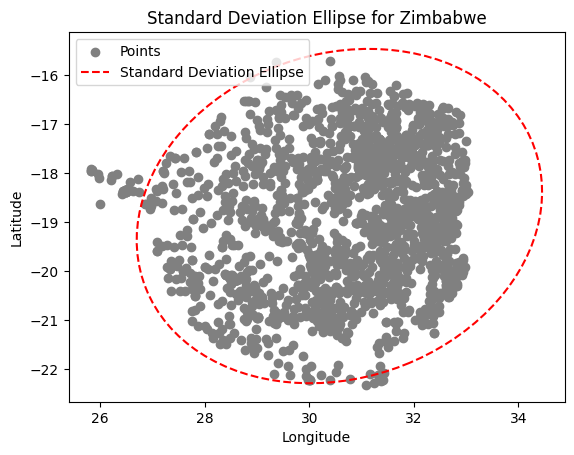

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Extract latitude and longitude from the data
x = data['Longitude'].values
y = data['Latitude'].values

# Check for NaN or infinite values in the input data
invalid_values = np.isnan(latitude) | np.isnan(longitude) | np.isinf(latitude) | np.isinf(longitude)

# Remove invalid values
latitude = latitude[~invalid_values]
longitude = longitude[~invalid_values]
print(f"Removed {np.sum(invalid_values)} invalid values.")

# Calculate the mean of latitude and longitude
mean_latitude = np.mean(latitude)
mean_longitude = np.mean(longitude)

# Calculate the covariance matrix of latitude and longitude
cov_matrix = np.cov(latitude, longitude)

# Calculate eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Determine the angle of rotation for the ellipse
theta = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0])

# Calculate the standard deviations along the major and minor axes
std_dev_major = np.sqrt(chi2.ppf(0.95, 2)) * np.sqrt(eigenvalues[0])
std_dev_minor = np.sqrt(chi2.ppf(0.95, 2)) * np.sqrt(eigenvalues[1])

# Generate points on the ellipse
t = np.linspace(0, 2 * np.pi, 100)
ellipse_latitude = mean_latitude + std_dev_major * np.cos(t) * np.cos(theta) - std_dev_minor * np.sin(t) * np.sin(theta)
ellipse_longitude = mean_longitude + std_dev_major * np.cos(t) * np.sin(theta) + std_dev_minor * np.sin(t) * np.cos(theta)

# Plot the points and the ellipse
plt.scatter(longitude, latitude, color='gray', label='Points')
plt.plot(ellipse_longitude, ellipse_latitude, color='red', linestyle='dashed', label='Standard Deviation Ellipse')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Standard Deviation Ellipse for Zimbabwe')
plt.legend()
plt.show()



In [15]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
#import pysal.model as pm



# Load the shapefile for Zimbabwe
#zimbabwe_shapefile = gpd.read_file('zimbabwe_shapefile.shp')

# Merge disease data with shapefile
merged_data = zimbabwe_shapefile.merge(data, on='ID')

# Plot the spatial distribution of disease cases
merged_data.plot(column='Diabetes Cases', cmap='Reds', legend=True)
plt.title('Spatial Distribution of Diabetes Cases in Zimbabwe')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Prepare data for spatial regression
y = merged_data['Diabetes Cases']  # Response variable (disease cases)
X = merged_data[['covariate1', 'covariate2', 'covariate3']]  # Covariates

# Perform spatial regression (Spatial Lag Model)
model = pm.spreg.ML_Lag(y.values[:, None], X.values, w=pm.weights.Queen.from_dataframe(merged_data, ids='ID'), name_y='Diabetes Cases', name_x=X.columns.tolist(), name_w='Queen')
results = model.fit()

# Print regression results
print(results.summary)



KeyError: 'ID'